# Dealing with Outliers

In statistics, an outlier is a data point that differs significantly from other observations.An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.

Remember that even if a data point is an outlier, its still a data point! Carefully consider your data, its sources, and your goals whenver deciding to remove an outlier. Each case is different!


# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

--------

There are many ways to identify and remove outliers:
* Trimming based off a provided value
* Capping based off IQR or STD
* https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
* https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

## Ames Data Set

Let's explore any extreme outliers in our Ames Housing Data Set

In [3]:
df = pd.read_csv("Ames_Housing_Data.csv")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

```markdown
## Checking for Missing Values
```

In [5]:
df.isnull().sum().sort_values(ascending=False)

Pool QC         2917
Misc Feature    2824
Alley           2732
Fence           2358
Fireplace Qu    1422
                ... 
MS SubClass        0
Central Air        0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 81, dtype: int64

/var/folders/c3/76_fcs312c97qwb0kwdq0v9h0000gn/T/ipykernel_23228/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

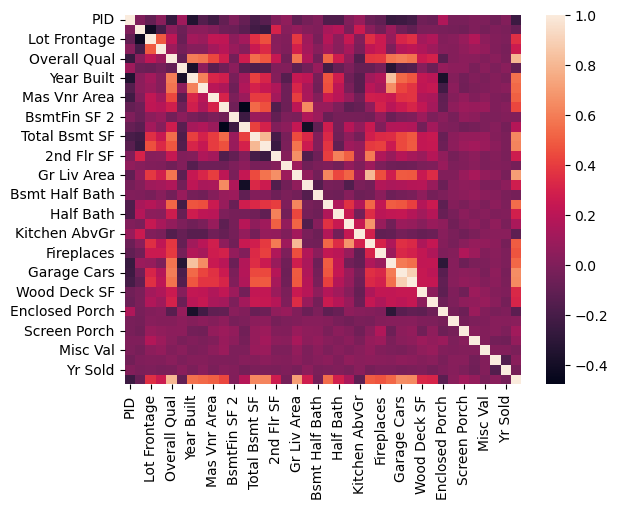

In [6]:
sns.heatmap(df.corr())

In [7]:
df.corr()['SalePrice'].sort_values(ascending=False)

/var/folders/c3/76_fcs312c97qwb0kwdq0v9h0000gn/T/ipykernel_23228/1823528897.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['SalePrice'].sort_values(ascending=False)


SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

/var/folders/c3/76_fcs312c97qwb0kwdq0v9h0000gn/T/ipykernel_23228/159151965.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['SalePrice'].sort_values(ascending=False).plot(kind='bar')


<Axes: >

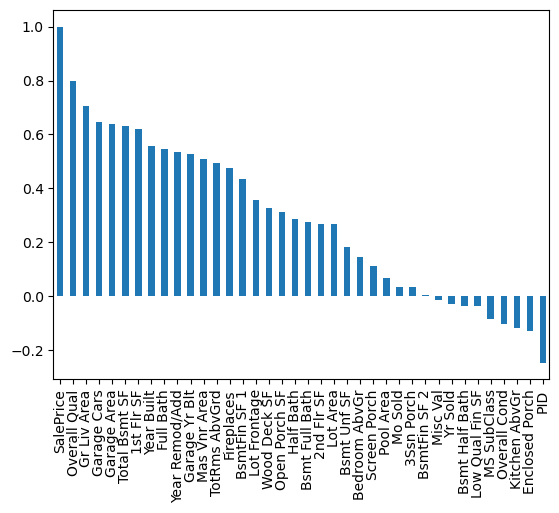

In [8]:
df.corr()['SalePrice'].sort_values(ascending=False).plot(kind='bar')

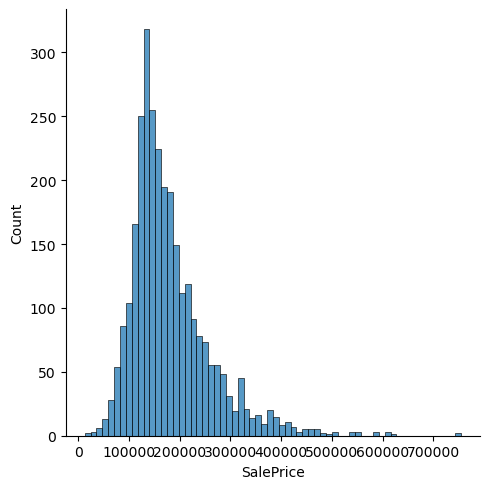

In [9]:
sns.displot(df["SalePrice"])

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

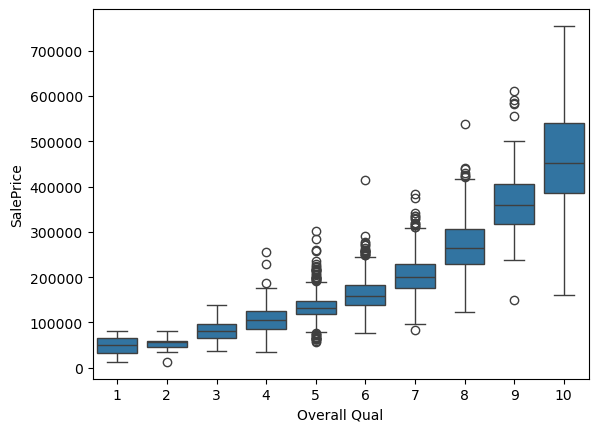

In [10]:
sns.boxplot(x='Overall Qual',y='SalePrice',data=df)

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

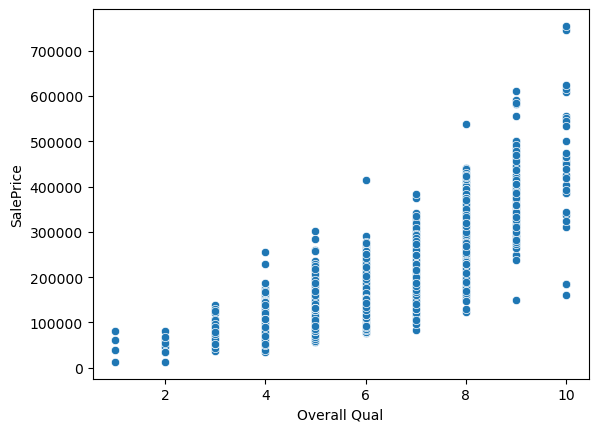

In [21]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

# find Column with outliner

In [15]:
import pandas as pd
import numpy as np

def detect_outliers(df, threshold=1.5):
    outlier_columns = []
    
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.2)
        Q3 = df[column].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        if ((df[column] < lower_bound) | (df[column] > upper_bound)).any():
            outlier_columns.append(column)
    
    return outlier_columns

columns_with_outliers = detect_outliers(df)
print("find Columns with outliers with length: ", len(columns_with_outliers))

columns_with_outliers

find Columns with outliers with length:  22


['Lot Frontage',
 'Lot Area',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Total Bsmt SF',
 '1st Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Full Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Garage Yr Blt',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'SalePrice']

In [16]:
df[columns_with_outliers].head()

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Total Bsmt SF,1st Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,...,Kitchen AbvGr,Garage Yr Blt,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
0,141.0,31770,112.0,639.0,0.0,1080.0,1656,0,1656,1.0,...,1,1960.0,210,62,0,0,0,0,0,215000
1,80.0,11622,0.0,468.0,144.0,882.0,896,0,896,0.0,...,1,1961.0,140,0,0,0,120,0,0,105000
2,81.0,14267,108.0,923.0,0.0,1329.0,1329,0,1329,0.0,...,1,1958.0,393,36,0,0,0,0,12500,172000
3,93.0,11160,0.0,1065.0,0.0,2110.0,2110,0,2110,1.0,...,1,1968.0,0,0,0,0,0,0,0,244000
4,74.0,13830,0.0,791.0,0.0,928.0,928,0,1629,0.0,...,1,1997.0,212,34,0,0,0,0,0,189900


<Axes: >

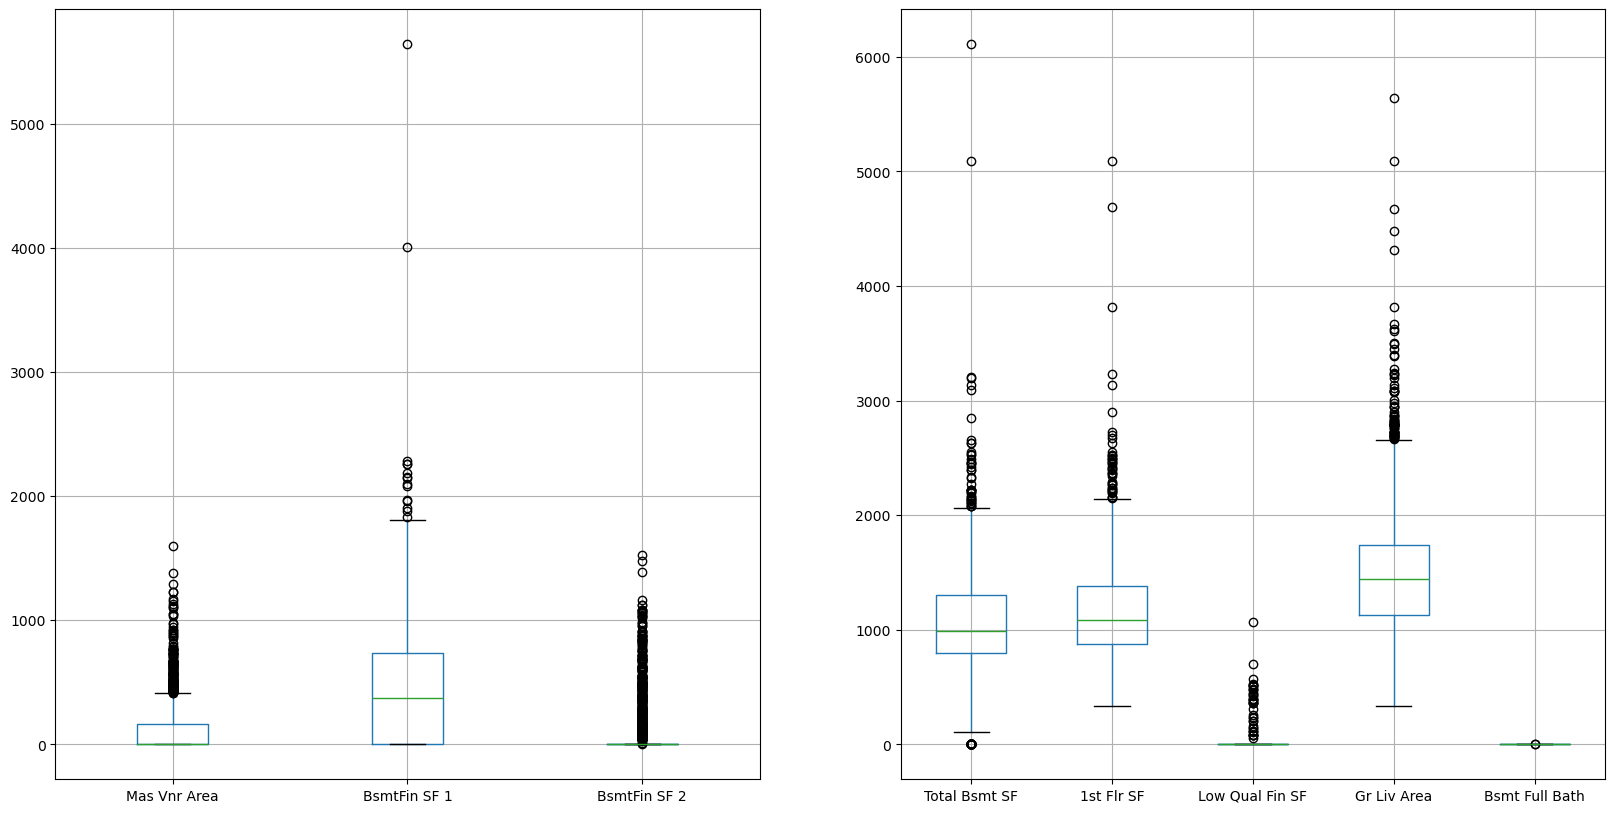

In [25]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
df.boxplot(column=columns_with_outliers[2:5], figsize=(10, 10))
plt.subplot(1, 2, 2)
df.boxplot(column=columns_with_outliers[5:10], figsize=(10, 10))

In [38]:
import pandas as pd
import numpy as np

def clean_outliers(df, threshold=1.5, method='clip'):
    """
    Clean outliers in a pandas DataFrame.
    
    Parameters:
    - df: pandas DataFrame
    - threshold: IQR multiplier for outlier detection (default: 1.5)
    - method: 'clip' or 'remove' (default: 'clip')
    
    Returns:
    - Cleaned DataFrame
    """
    df_cleaned = df.copy()
    
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.2)
        Q3 = df[column].quantile(0.9)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        if method == 'clip':
            df_cleaned[column] = df_cleaned[column].clip(lower_bound, upper_bound)
        elif method == 'remove':
            df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned





In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [40]:
df_cleaned_clip = clean_outliers(df, method='clip')
df_cleaned_clip

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,25247.75,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000.0
1,526350040,20,RH,80.0,11622.00,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000.0
2,526351010,20,RL,81.0,14267.00,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,0,6,2010,WD,Normal,172000.0
3,526353030,20,RL,93.0,11160.00,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000.0
4,527105010,60,RL,74.0,13830.00,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937.00,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500.0
2926,923276100,20,RL,NaN,8885.00,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000.0
2927,923400125,85,RL,62.0,10441.00,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,0,7,2006,WD,Normal,132000.0
2928,924100070,20,RL,77.0,10010.00,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000.0


<Axes: >

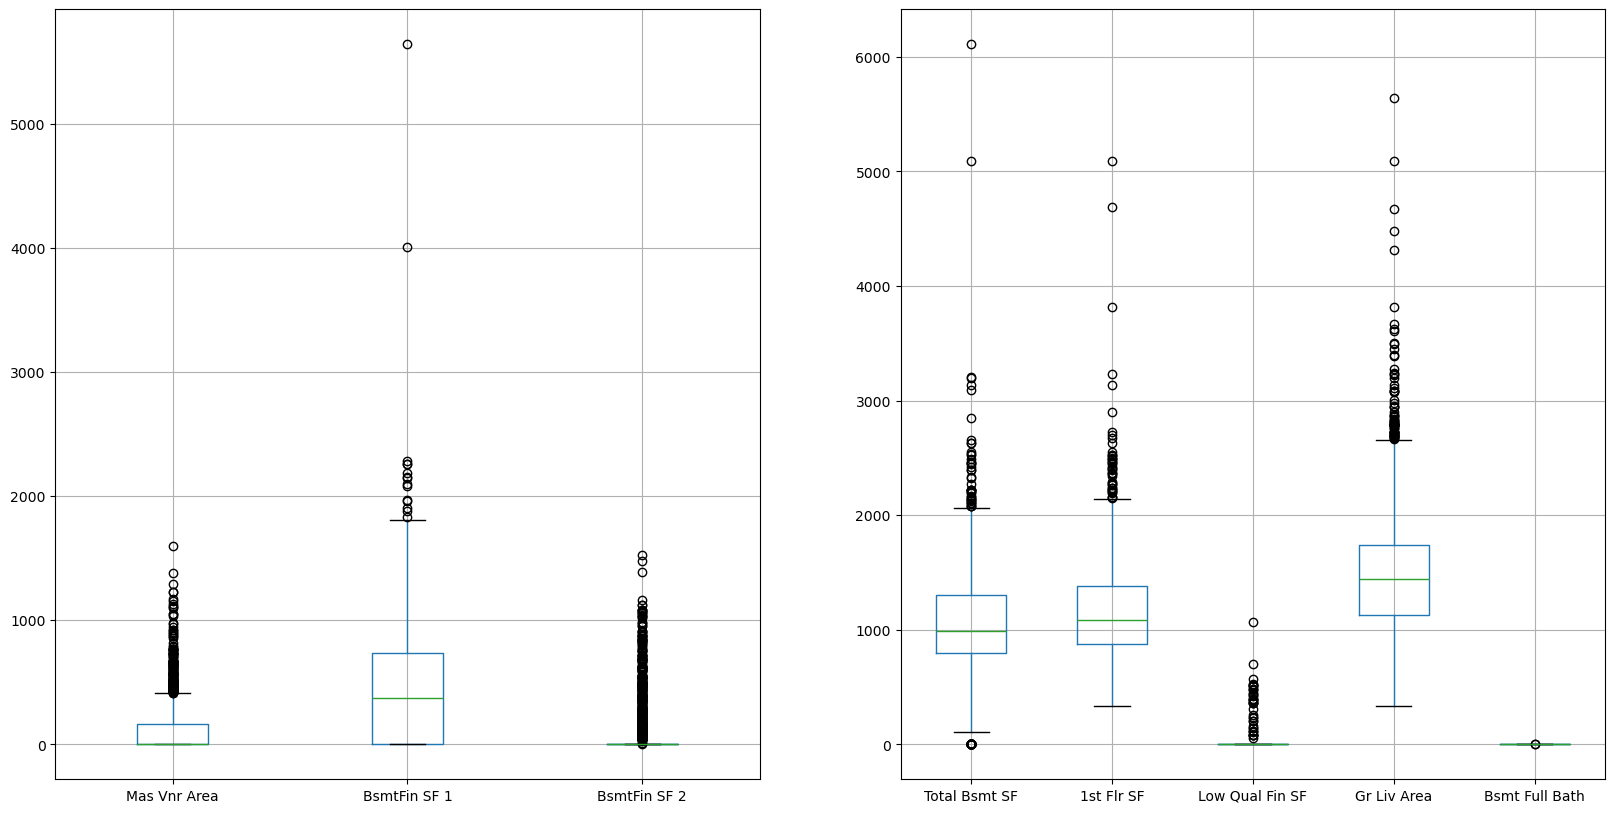

In [41]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
df.boxplot(column=columns_with_outliers[2:5], figsize=(10, 10))
plt.subplot(1, 2, 2)
df.boxplot(column=columns_with_outliers[5:10], figsize=(10, 10))

<Axes: >

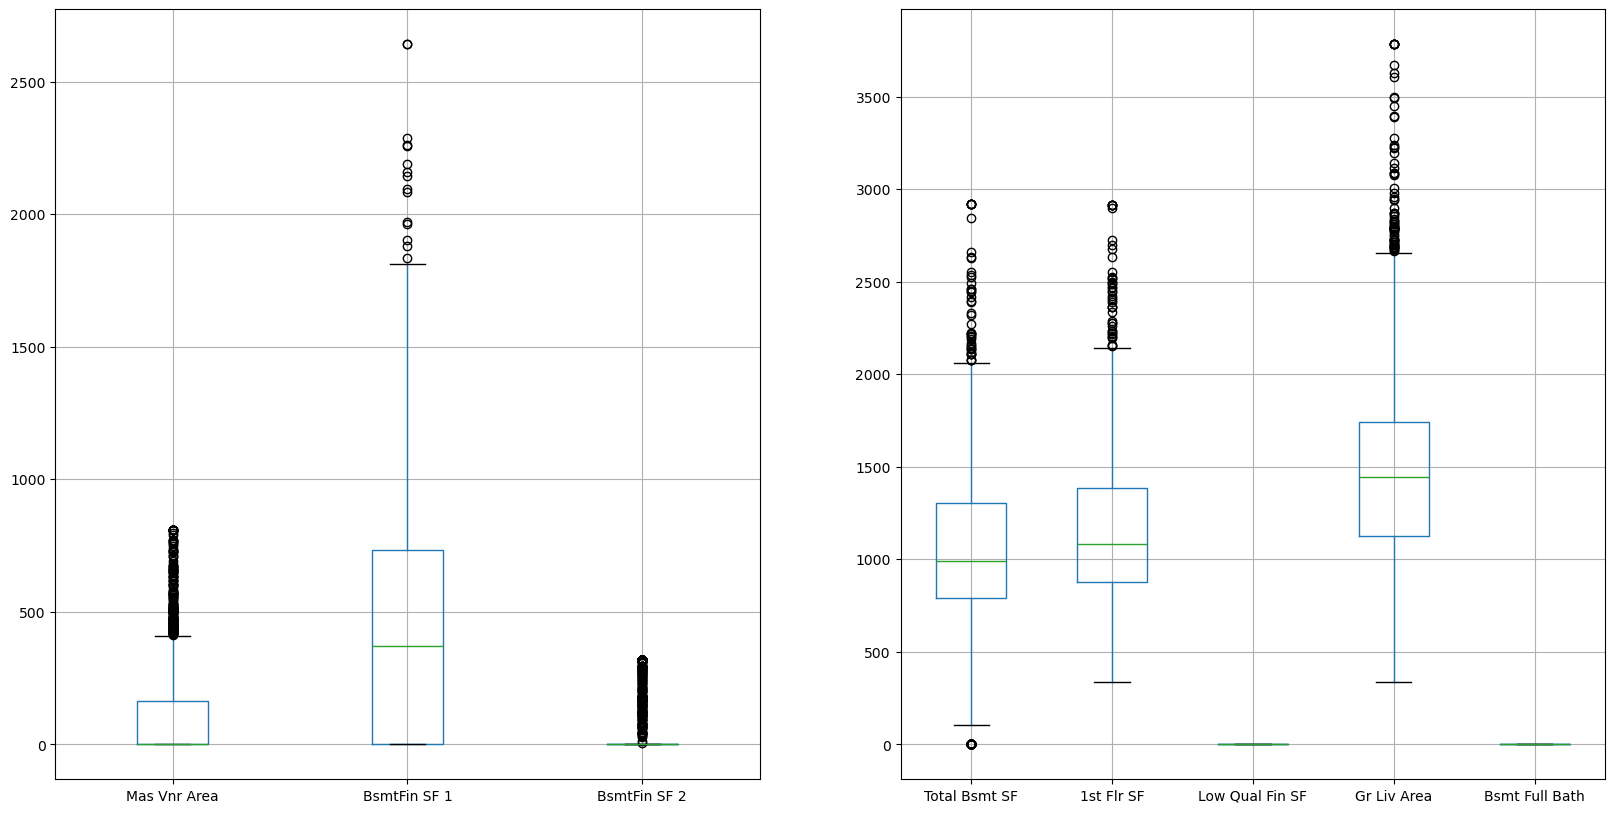

In [42]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
df_cleaned_clip.boxplot(column=columns_with_outliers[2:5], figsize=(10, 10))
plt.subplot(1, 2, 2)
df_cleaned_clip.boxplot(column=columns_with_outliers[5:10], figsize=(10, 10))

In [43]:
df_cleaned_remove = clean_outliers(df, method='remove')
df_cleaned_remove

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
8,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,923228310,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,71000
2923,923250060,20,RL,80.0,17400,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,160000
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


<Axes: >

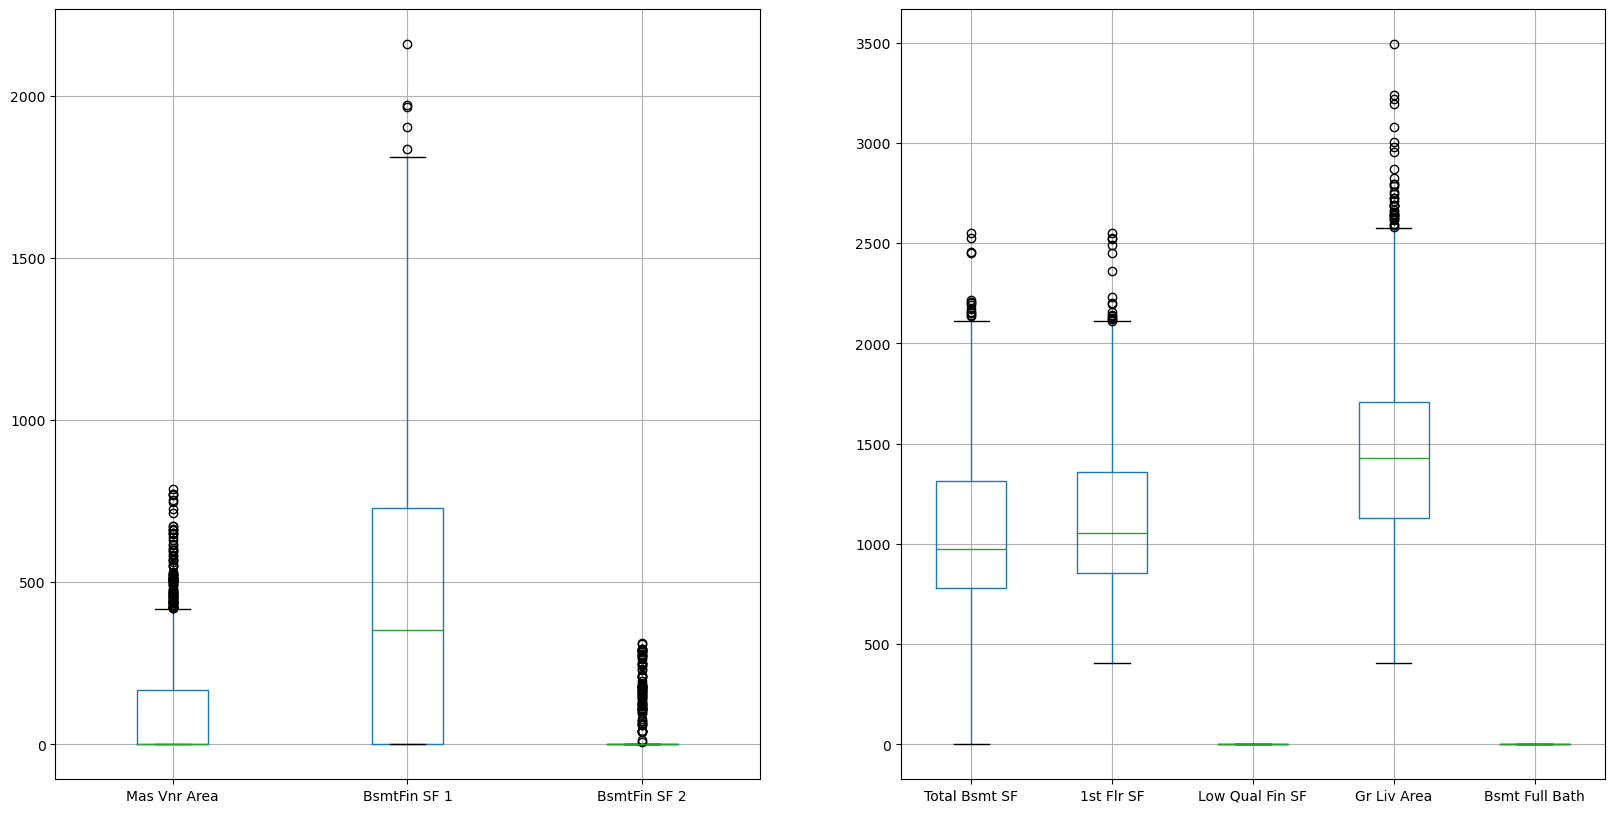

In [44]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
df_cleaned_remove.boxplot(column=columns_with_outliers[2:5], figsize=(10, 10))
plt.subplot(1, 2, 2)
df_cleaned_remove.boxplot(column=columns_with_outliers[5:10], figsize=(10, 10))